# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 3</p>
## <p style="text-align: center;">Total points: 85</p>
## <p style="text-align: center;">Due: Monday, **Oct 18th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Rushiil Deshmukh

EID: rsd949

Name: Troy Richard

EID: tdr944

# Question 1: Stochastic gradient descent II (20 pts)

Write an SGD solution in Python to the non-linear model without using any other library except for those provided in the code template below. 

$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2 + w_4x_1x_2^2 + w_5x_2^3$$ 

The solution class template is given. The `init()` function of the class takes as input the `learning_rate`, `regularization_constant` and `number_of_epochs`. The `fit()` method must take as input `X`, `y` and `update_rule` which can be `'sgd_momentum'` or `'RMSprop'`. The `predict()` method takes an `X` value (optionally, an array of values). 

Use your new gradient descent regression to train your model and predict the data given in 'SGD_samples.csv', for 30 epochs, using learning rates: `[0.0001, 0.001, 0.01, 0.05]` and regularization (ridge regression) constants: `[0, 0.01, 0.1]`. **(8 points)** 

Plot MSE and the $w$ parameters as a function of epoch (for 30 epochs) for the best 2 combinations of `learning_rate` and `regularization_constant` for SGD-Momentum, RMSprop, i.e., for each combination, you should have one plot for MSE vs Epoch and another for the parameters(weights) vs Epoch using respectively SGD-Momentum and RMSprop, hence in total 8 plots. Report the `learning_rate`, `regularization_constant` and MSE at the end of 30 epochs for the two best combinations for SGD-Momentum and RMSprop respectively. **($4\times 2 = 8$ pts)**

Observe the results, compare the performance of the two learning methods **(4 pts)**. 

Here is a blog which you can go through to know about RMSprop and Adam - [blog](http://ruder.io/optimizing-gradient-descent/).

Following codes are for your reference, please don't change the initialization values of the given parameters.


## Answer:

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

num_of_coefs = 6

class LinearRegression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.eps = 10**-8
        self.coef = np.zeros(num_of_coefs) # coefficient vector
        self.cache = np.zeros(self.coef.shape) # used only for rmsprop
        self.gama = 0.9 # used only for rmsprop
        self.mu = 0.9 # used in momentum
        self.v = np.zeros(self.coef.shape)

    def rmsprop(self, gradient):
        '''
        updates self.coef based on gradient using rmsprop
        '''
        self.cache = self.gama*self.cache + (1-self.gama)*(gradient**2)
        self.coef = self.coef - self.learning_rate*gradient*(1/np.sqrt(self.cache+self.eps))

    def sgd_momentum(self, gradient):
        '''
        updates self.coef based on gradient using Sgd_momentum
        '''
        self.v = self.mu*self.v + self.learning_rate*gradient 
        self.coef = self.coef - self.v
    
    def fit(self, X, y, update_rule='sgd_momentum', plot=False):
        '''
        Fit the model given X, y. It uses the specified update_rule
        and displays a plot of the coefficients vs epochs, and mse vs epochs if plot is set as True. 
        
        -> use get_features to get the features from X
        -> for epoch in epochs:
            iterate through all x, y.
                compute prediction using linearPredict.
                compute gradient.
                pass this gradient to the corresponding update function and update the coefficients
                keep track of mse and coefficients
        -> plot if required
        
        '''
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                X_i = X[i,:]
                
                error_i = self.linearPredict(X_i) - y[i]
                
                gradient = np.array([2*error_i*X_i[0] + 2*self.regularization*self.coef[0],
                                     2*error_i*X_i[1] + 2*self.regularization*self.coef[1],
                                     2*error_i*X_i[2] + 2*self.regularization*self.coef[2],
                                     2*error_i*X_i[3] + 2*self.regularization*self.coef[3],
                                     2*error_i*X_i[4] + 2*self.regularization*self.coef[4],
                                     2*error_i*X_i[5] + 2*self.regularization*self.coef[5]])
                                        
               
                if update_rule == 'sgd_momentum':
                    self.sgd_momentum(gradient)
                elif update_rule == 'RMSprop':
                    self.rmsprop(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure(figsize=(10,5))
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('Epoch')
            plt.ylabel('MSE')
            plt.figure(figsize=(10,5))
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.plot(range(self.n_epoch),coefs[:,4],label='w4')
            plt.plot(range(self.n_epoch),coefs[:,5],label='w5')
            plt.legend()
            plt.xlabel('Epoch')
            plt.ylabel('Parameter value')
              
        
    def get_features(self, X):
        x = np.zeros((X.shape[0], num_of_coefs))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = (X[:,0]**2)*X[:,1]
        x[:,4] = X[:,0] * (X[:,1]**2)
        x[:,5] = X[:,1]**3
       
        return x
        
    def linearPredict(self, X_features):
        '''
        returns the dot product of X and self.coef
        '''
        return np.dot(X_features,self.coef)

In [3]:
# # Only use this code block if you are using Google Colab.
# # If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

# ## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
# ## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 30
learning_rate = [0.0001, 0.001, 0.01, 0.05]
regularization = [0, 0.01, 0.1]

SGD momentum combos
The first combo is (0.0001, 0)
The second combo is (0.001, 0)
The SGD Momentum MSE scores are [0.020338107645762996, 0.020350898792292647]


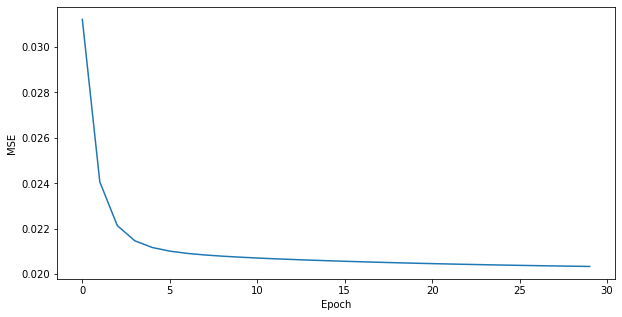

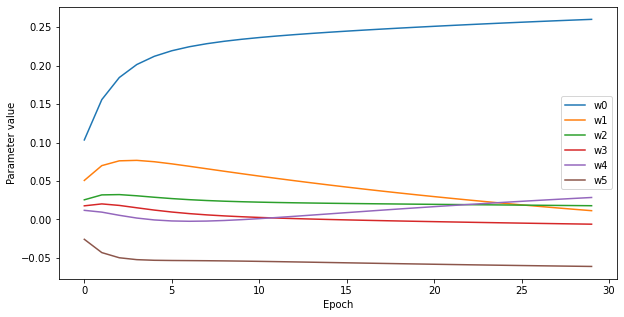

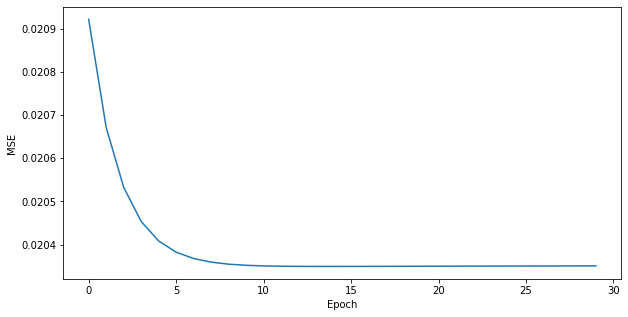

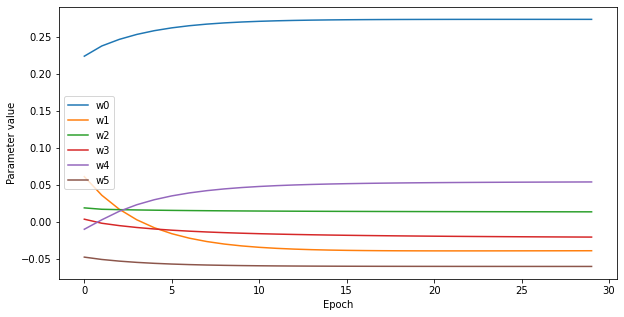

In [5]:
#Make a list of arrays for the learning rates and the regularization rates
combo_list = []
for lr in range(0, len(learning_rate)):
    for reg in range(0, len(regularization)):
        combo_list.append((learning_rate[lr], regularization[reg]))
#Make an empty list for the lowest mse scores.
lowest_mse_scores = []

#Iterate over the list of arrays to find lowest mse.
for i in range(0, len(combo_list)):
    sgd = LinearRegression(combo_list[i][0], combo_list[i][1], n_epochs)
    sgd.fit(X,y,plot=False)
    lowest_mse_scores.append(sgd.lowest_mse)

#Show the best combo
chosen_combo_list = np.argsort(np.array(lowest_mse_scores))[:2]
print("SGD momentum combos")
print('The first combo is', combo_list[chosen_combo_list[0]])
print('The second combo is', combo_list[chosen_combo_list[1]])
lowest_mse_scores = []
#Iterate over the duo to put in the parameters to get the lowest mse score for each of them.
for i in chosen_combo_list:
    sgd = LinearRegression(combo_list[i][0], combo_list[i][1], n_epochs)
    sgd.fit(X,y,plot=True)
    lowest_mse_scores.append(sgd.lowest_mse)
print('The SGD Momentum MSE scores are', lowest_mse_scores)

RMSprop combos
The first combo is (0.001, 0.1)
The second combo is (0.01, 0)
The RMSprop MSE scores are [0.021931566283737488, 0.029632288925625593]


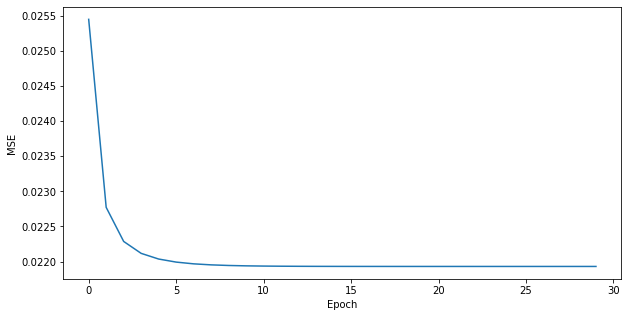

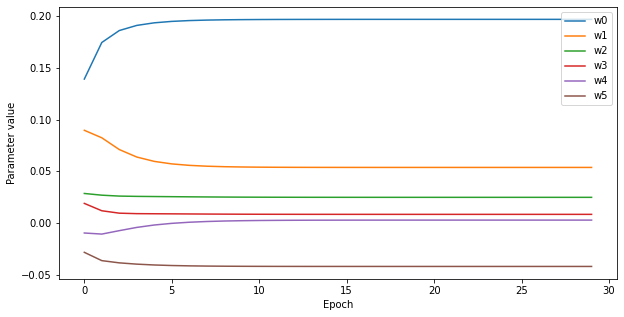

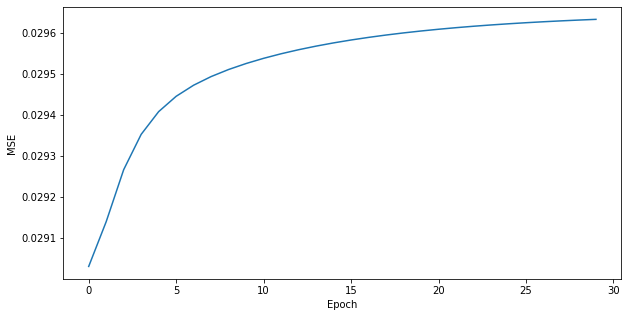

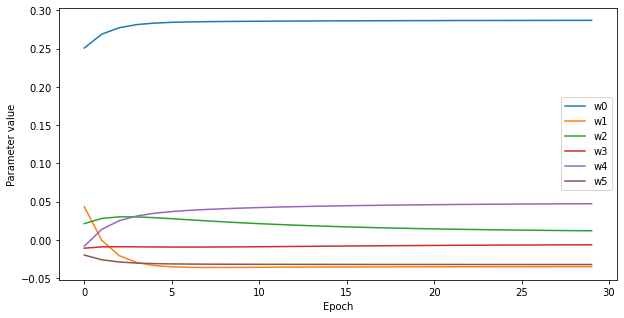

In [6]:
#Iterate over the list of arrays to find lowest mse.
for i in range(0, len(combo_list)):
    sgd = LinearRegression(combo_list[i][0], combo_list[i][1], n_epochs)
    sgd.fit(X,y,'RMSprop',plot=False)
    lowest_mse_scores.append(sgd.lowest_mse)

#Show the best combo
chosen_combo_list = np.argsort(np.array(lowest_mse_scores))[:2]
print("RMSprop combos")
print('The first combo is', combo_list[chosen_combo_list[0]])
print('The second combo is', combo_list[chosen_combo_list[1]])
lowest_mse_scores = []
#Iterate over the duo to put in the parameters to get the lowest mse score for each of them.
for i in chosen_combo_list:
    sgd = LinearRegression(combo_list[i][0], combo_list[i][1], n_epochs)
    sgd.fit(X,y,'RMSprop',plot=True)
    lowest_mse_scores.append(sgd.lowest_mse)
print('The RMSprop MSE scores are', lowest_mse_scores)

RMSProp is an adaptive Learning Algorithm, while SGD momentum uses a constant learning rate.  

RMSProp:

$$g=1m∑m1L(y^,y)$$

$$r=δr+(1−δ)g∘g$$

$$Δθ=−ϵr+δ√∘g$$

$$θ=θ+δθ$$

SGD With Momentum:

$$g=1m∑m1L(y^,y)$$

$$v=αv−ϵg$$

$$θ=θ+v$$

We see that the lowest MSE for **SGD momentum** is **0.020338107645762996** whereas the lowest MSE for **RMSprop** is **0.021931566283737488**. RMSProp uses a larger initial **learning rate** of **0.001**. It does not return infinite or very large values even at higher learning rates. This is because RMSProp divides the learning rate by an exponentially decaying average of squared gradients. This helps in taking a larger initial learning rate and reduces it when the gradient is higher, while helping in a faster convergence.

## Question 2: Tensorflow Playground (15 pts)

In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).

Select "**Classification**" as the **Problem Type**. Among the four datasets shown in DATA, please select the **top right** dataset. 

Use the following settings as the DEFAULT settings for all **subquestions**: Learning rate = 0.03, Activation = Tanh, Regularization = None, Ratio of training to test data = 50%, Noise = 0, Batch Size = 30, input as $X_1$ with $X_2$, One hidden layer with two neurons.

a) **(4 pts)** Use the DEFAULT setting and run two experiments - one using **Tanh** as the activation function and one using the **Linear** activation function. Report the train, test losses for both at the end of **1000 epochs**. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this? 

We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with **Tanh** as the activation.

b) **(4 pts)** Effect of number of hidden units: Keep other settings the same as in DEFAULT, report the training loss and test loss at the end of 1000 epochs **using 4 neurons and 8 neurons in the hidden layer**. What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this? 

c) **(4 pts)** Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT, change the Activation to **ReLU** and use **4 neurons** in the hidden layer. For learning rate 10, 1, 0.1, 0.01 and 0.001, report the train, test losses at the end of **100 epochs**, **1000 epochs** respectively. What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? 

d) **(3 pts)** Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as $\sin(X_1), X_1^2$ etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc. 

# Answer:

In [7]:
from IPython.display import Image

**Part A**

TanH Activation:  
Training loss = 0.176  
Test loss = 0.178  

Linear Activation:  
Training loss = 0.479  
Test loss = 0.535  

Using a tanh function, the mdoel si able to capture some of the trends in the data, thereby able to classify it, albeit with a high loss rate. For linear activation, the decision boundary is linear, which cannot capture any trends in the data. Hence the classification loss value is higher than a tanH activation.

**Part B**

4 neurons:  
Training loss = 0.019  
Test loss 0.024  

8 neurons:  
Training loss = 0.008  
Test loss = 0.013  

As the number of neurons increases, the model gets more adaptive, so it is able to capture smaller details in the trends of the given dataset. However, the model gets more affected to over-fitting and so the generalization of the classification model can also decrease

**Part C**

Learning rate 10:  
100 epochs:  
Training loss 0.912  
Test loss 0.856  

1000 epochs:  
Training loss 0.568  
Test loss 0.536  

Learning rate 1:  
100 epochs:  
Training loss 0.000    
Test loss 0.009    

1000 epochs:  
Training loss 0.000  
Test loss 0.007  

Learning rate 0.1:  
100 epochs:  
Training loss 0.010  
Test loss 0.011  

1000 epochs:  
Training loss 0.172  
Test loss 0.196  

Learing rate 0.01:  
100 epochs:  
Training loss 0.316  
Test loss 0.321  

1000 epochs:  
Training loss 0.010  
Test loss 0.014  


Learning rate 0.001:  
100 epochs:   
Training loss 0.366  
Test loss 0.365  

1000 epochs:  
Training loss 0.058  
Test loss 0.059  

Increasing the learning rate reduces the loss up until a learning rate of 1 with the lowest loss value of 0.007, beyond which the loss increases. As we increase the nimber of epochs, the loss decreases. This is because as the number of epochs increases, the same number of times weights are changed in the neural network and the boundary goes from underfitting to optimal to overfitting.

**Part D**

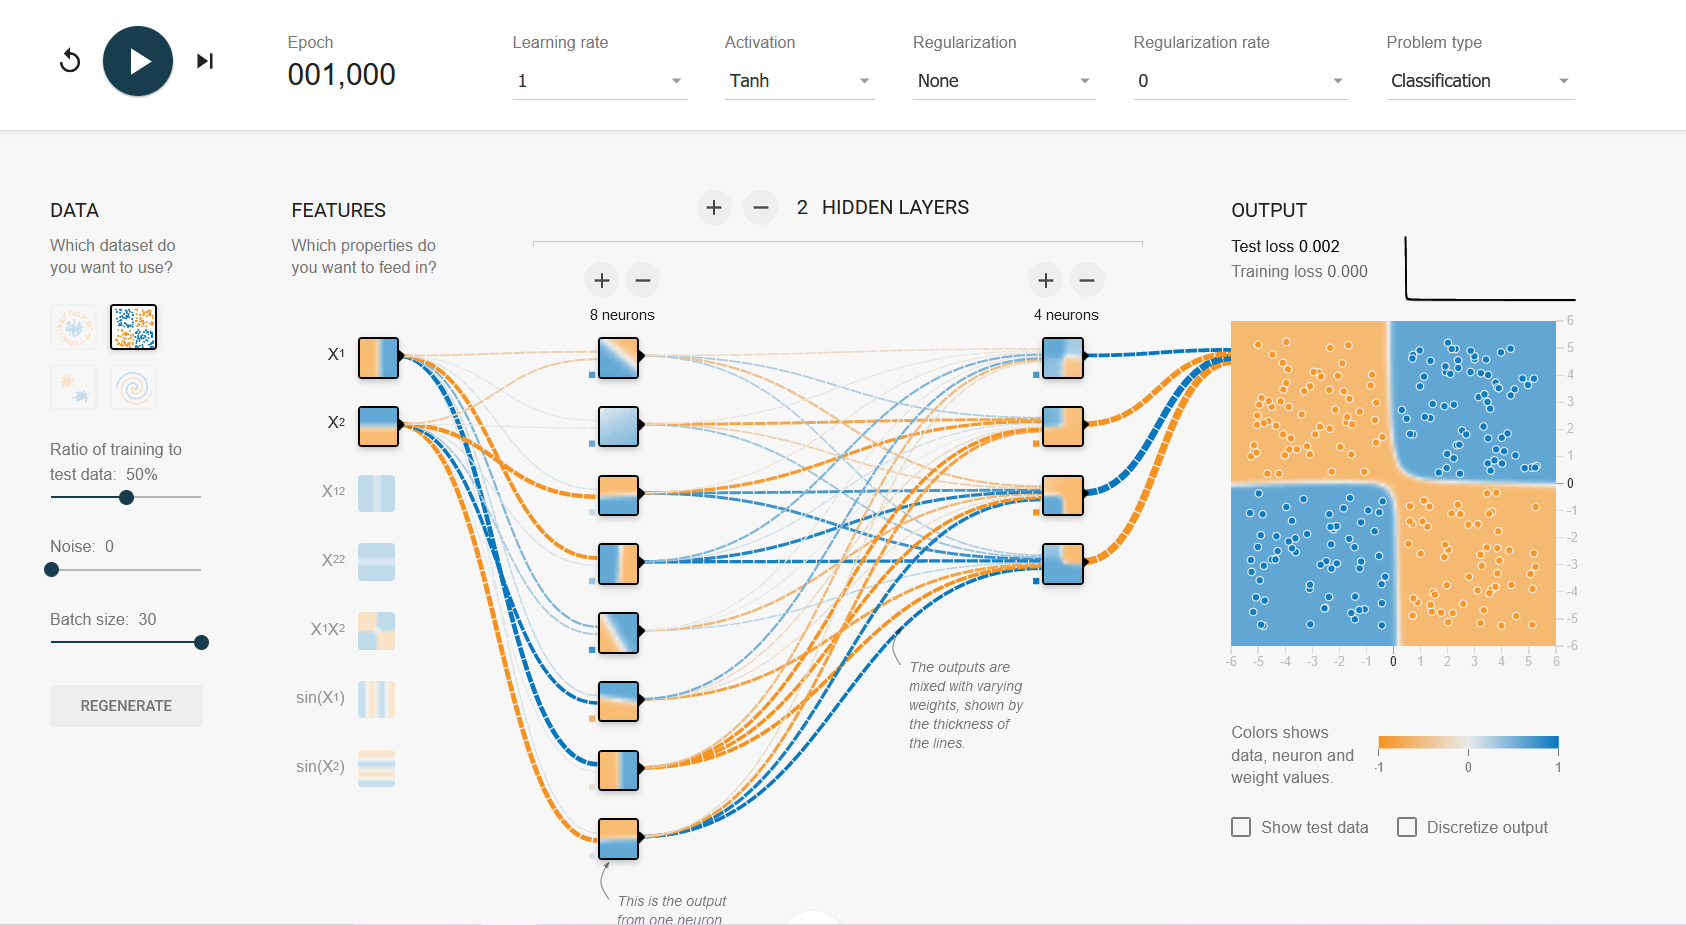

In [8]:
Image('Q2P4-1.PNG')

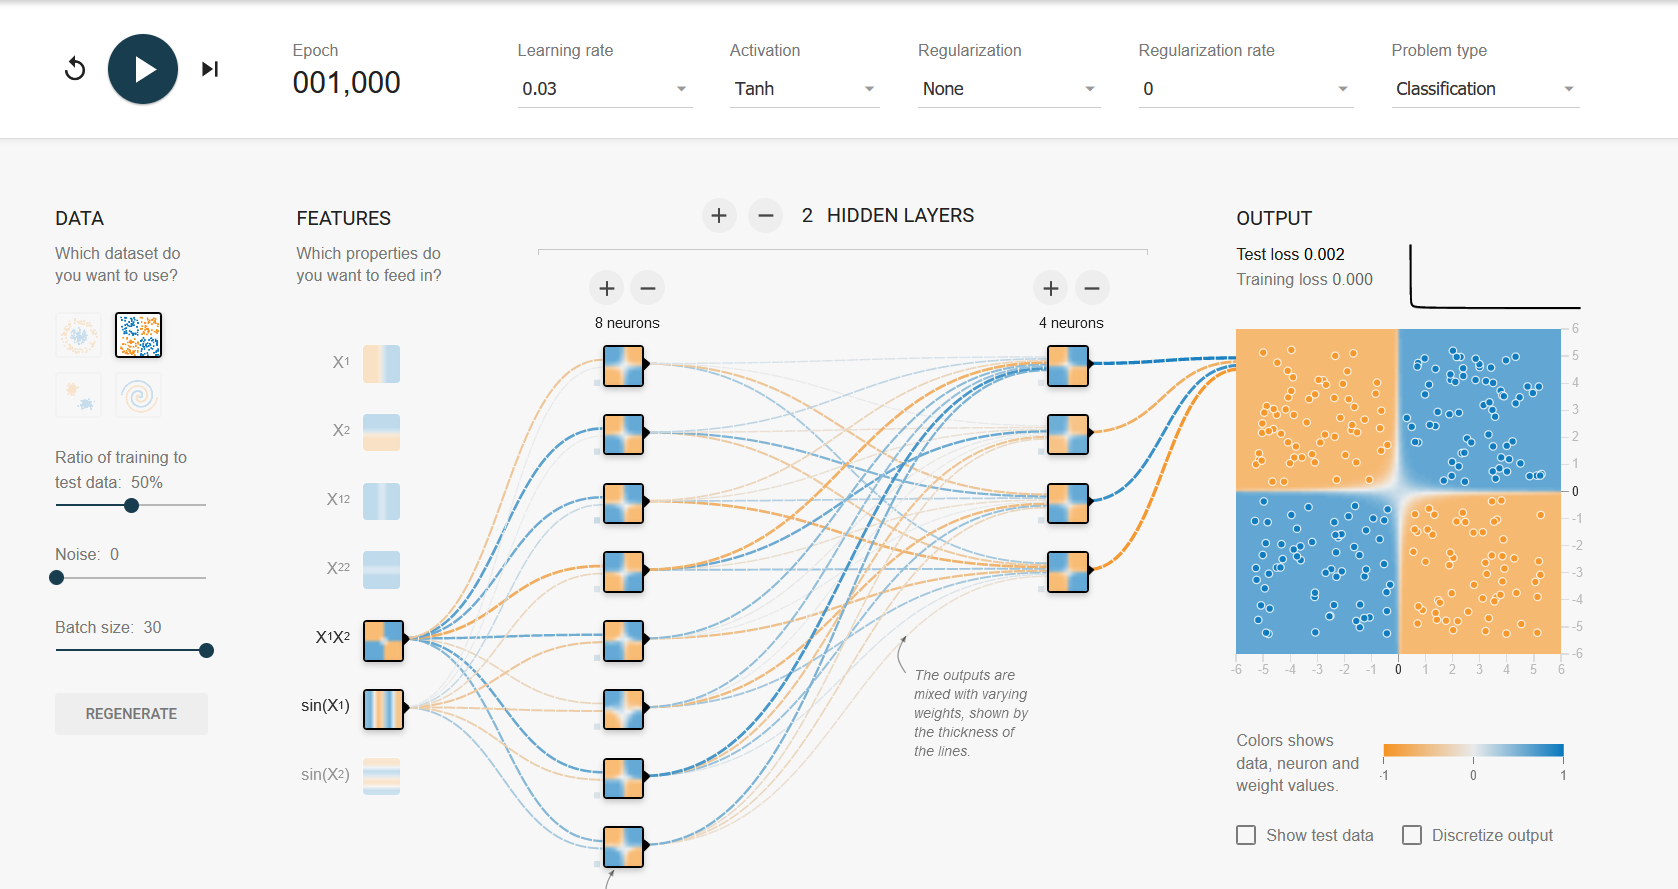

In [9]:
Image('Q2P4-2.PNG')

Increasing the number of hidden layers in the network helps reduce the training loss to 0 and the testing loss to 0.002.  
A single-layer neural network can only be used to represent linearly separable functions. Thus, adding an extra layer of upto 4 neurons can account for non linearity of functions and help better classify the data.

# Question 3: Outlier detection using PyOD (30 pts)

Oulier detection, or anomaly detection is usually an unsupervised learning task where the objective is to identify suspicious observations in data. It has been widely used in military surveillance for enemy activities to prevent attacks, intrusion detection in cyber security, fraud detection for credit cards, etc.

PyOD is a comprehensive and scalable Python library for detecting outlying objects in multivariate data. PyOD includes more than 30 detection algorithms and provides unified APIs which makes it quite handy to use. In this question, you will play with PyOD, explore three different outlier detection algorithms and compare their performances. First let's install PyOD.

```
# install pyod using pip first
!pip install pyod
```

You can load the data stored in 'Q3_train_dataset.csv' and 'Q3_test_dataset.csv' using the following codes.

```
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()
```

 `X_train` and `X_test` contain the features, with the dimension of 5. `y_train` and `y_test` store the outlier labels, 0 means normal data, 1 means outlier data. 
 
a) **(5 pts)** **Fit `X_train` to a linear outlier detection model Minimum Covariance Determinant (MCD) using PyOD**, this [page](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.mcd) will provide some functions you may need. 

```
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# YOUR CODE SHOULD COME HERE, FIT THE MODEL USING X_TRAIN
```
**Use the fitted model to predict the outlier labels of `X_test`. Compute the raw outlier scores on `X_test` using `decision_function()`.**

**Run PyOD's `evaluate_print()` function using the test set ground truth outlier labels and the raw outlier scores predicted by the model, to compute the ROC and Precision@n results .** 

```
from pyod.utils.data import evaluate_print
```

b) **(5 pts)** `X_train` and `X_test` are 5-dimension features, which makes it impossible to visualize them in Euclidean plane. But we can use Principal Component Analysis (PCA) to reduce the dimensions of `X_train` and `X_test` to 2, and then plot them. You may want to use `fit_and_transform()` function.


```
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = # IMPLEMENT
test_principalComponents = # IMPLEMENT
```

After reducing the dimension to 2, now you can visualize the outliers using PyOD's `visualize()` function. Please plot the visualization. You may find [this](https://pyod.readthedocs.io/en/latest/pyod.utils.html#module-pyod.utils.example) useful on how to use `visualize()` .

```
from pyod.utils.example import visualize
```

Now you should be able to observe the ground truth outliers and the outliers predicted by the model.


c) **(20 pts)** Apply the same process as in (a) and (b) to the following two models, and visualize the outlier results. Please compare the performance of the three models in terms of their ROC, Precision@n, and what you observe from the three visualizations.

*   [Proximity-Based model - Clustering Based Local Outlier Factor (CBLOF)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.cblof)
*   [Probabilistic model - Copula-based Outlier Detection (COPOD)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.copod)

```
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD
```

# Answer:

In [10]:
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()

In [11]:
# (a)
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# fit the model using X_train
clf.fit(X_train)
y_train_pred = clf.labels_
y_test_pred = clf.predict(X_test)
test_outliers = clf.decision_function(X_test)

In [12]:
from pyod.utils.data import evaluate_print
# predict the outlier labels of X_test using the trained model, compute the raw outlier scores on X_test using decision_function()
# then use evaluate_print() to print out the evaluation results

evaluate_print(clf, y_test, test_outliers)

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None) ROC:0.8689, precision @ rank n:0.6


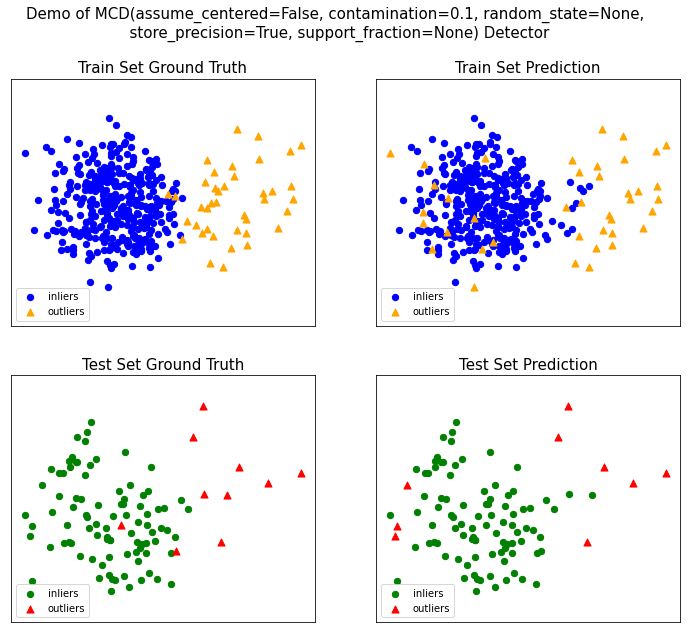

In [13]:
# (b)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = pca.fit_transform(X_train)
test_principalComponents = pca.fit_transform(X_test)

from pyod.utils.example import visualize
# Visualize the ground truth outliers and predicted outliers using visualize()

visualize(clf, train_principalComponents, y_train, test_principalComponents, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)

CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False) ROC:0.8989, precision @ rank n:0.7


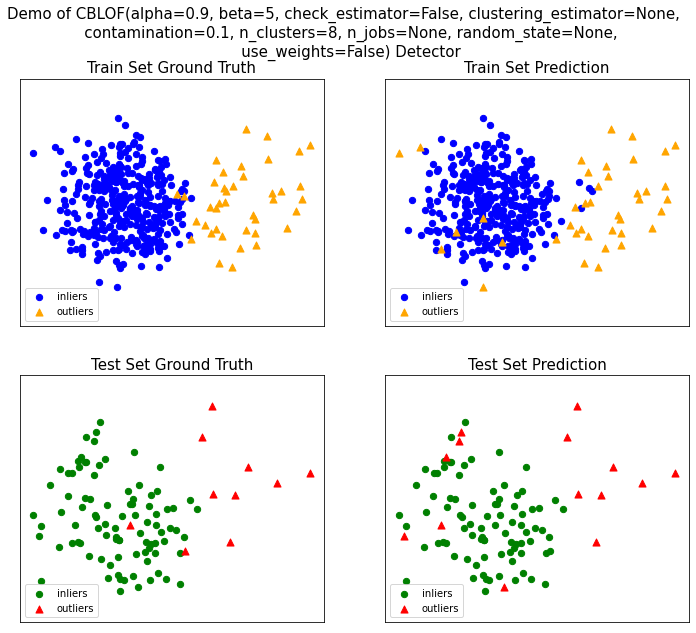

In [34]:
# (c)
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD

# CBLOF
clf1 = CBLOF() 
clf1.fit(X_train)
y_train_pred = clf1.labels_
y_test_pred = clf1.predict(X_test)
test_outliers = clf1.decision_function(X_test)
evaluate_print(clf1, y_test, test_outliers)
pca = PCA(n_components=2)
train_principalComponents = pca.fit_transform(X_train)
test_principalComponents = pca.fit_transform(X_test)
visualize(clf1, train_principalComponents, y_train, test_principalComponents, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)

COPOD(contamination=0.1, n_jobs=1) ROC:0.9556, precision @ rank n:0.8


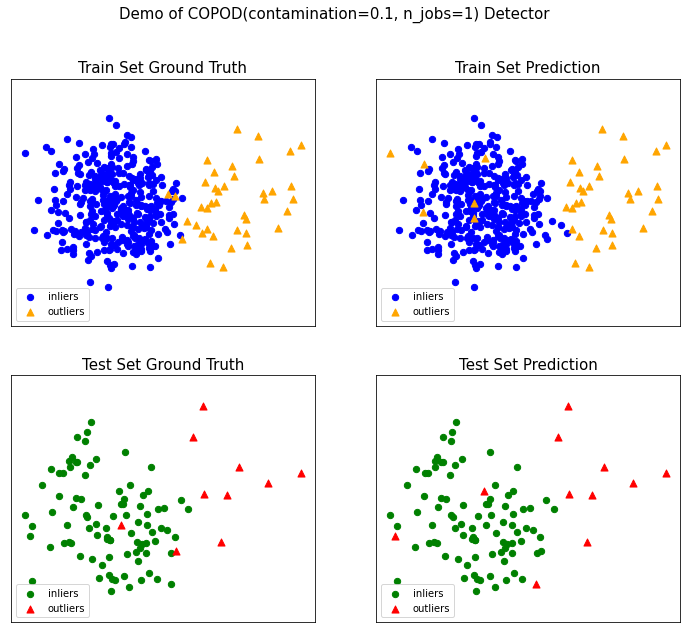

In [29]:
# COPOD
clf2 = COPOD() 
clf2.fit(X_train)
y_train_pred = clf2.labels_
y_test_pred = clf2.predict(X_test)
test_outliers = clf2.decision_function(X_test)
evaluate_print(clf2, y_test, test_outliers)
pca = PCA(n_components=2)
train_principalComponents = pca.fit_transform(X_train)
test_principalComponents = pca.fit_transform(X_test)
visualize(clf2, train_principalComponents, y_train, test_principalComponents, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)

COPOD is better in terms of the ROC value and precision at rank n. CBLOF is marginally better than MCD for ROC and has similar precision. In terms of visualization, CBLOF is slightly better than COPOD. Overall, COPOD is the best model.

## Question 4: PCA Conceptual questions (5 pts)
Explain the principle of Principal Component Analysis algorithm, especially why we can select the best projection bases based on the covariance matrix of data from the perspective of optimization?

# Answer:

PCA reduces dimensionality of larger data sets by transforming large variable sets into smaller ones that contain most of the information found in the larger sets. This does reduce accuracy, however there is an optimal point between the amount of dimensionality reduction needed and accuracy given up as a result. Beyond this point, the simplicity cannot be justified given the impactful accuracy loss. These smaller data sets allow for more accessible and efficient exploration and visualization of data. 

PCA finds a linear subspace that maximizes the variance of the data once it is projected into that space. This is equivalent to finding a linear subspace that minimizes the distance of the projection in a least-squares method. The eigenvectors of the Covariance matrix are the directions of the axes where there is the most variance i.e the Principal Components. Eigenvalues are the coefficients attached to eigenvectors, which give the amount of variance carried in each Principal Component. By ranking eigenvectors in order of their eigenvalues, highest to lowest, we get the principal components in order of significance.



# Question 5: Pre-processing and sampling (15 pts)

The following dataset contains House prices describing the sales of individual residential property in Ames, Iowa data with explanatory variables describing almost every aspect of residential homes and dependent variable being SalePrice. Here, some cells of most columns in the dataset contain NaN values.













In [16]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
np.random.seed(100)

data = pd.read_csv("sales_data.csv")
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,...,0,0,0,NaN,NaN,NaN,0,2,2008,208500
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,...,0,0,0,NaN,NaN,NaN,0,5,2007,181500
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,...,0,0,0,NaN,NaN,NaN,0,9,2008,223500
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,...,0,0,0,NaN,NaN,NaN,0,2,2006,140000
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,...,0,0,0,NaN,NaN,NaN,0,12,2008,250000



a) **(2 pts)** Print the number of NaN values in each column.


In [17]:
data.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Alley            1369
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          8
ExterQual           0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeatur

b) **(3 pts)** Create a copy of `data`, and name it `data_dm`, then create a new column in `data_dm` named `binned_yr_built` and apply binning to the column `yr_built`. Use `pandas.cut()` and modify its paramter list as below:

```
bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']
include_lowest=True
```
Next, perform one-hot encoding on this new column.

In [18]:
data_dm = data.copy()

In [19]:
bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']
data_dm['binned_yr_built'] = pd.cut(data['YearBuilt'], bins = bins, labels = labels)
test = pd.get_dummies(data_dm['binned_yr_built'], prefix='yr')
test

,yr_1900-1920,yr_1920-1940,yr_1940-1960,yr_1960-1980,yr_1980-2000,yr_2000-2020
0,0,0,0,0,0,1
1,0,0,0,1,0,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
1455,0,0,0,0,1,0
1456,0,0,0,1,0,0
1457,0,0,1,0,0,0
1458,0,0,1,0,0,0



c) **(2 pts)** Drop the columns which have more than 65 percentage of missing values.

In [20]:
data_dm_2 = data_dm.copy()
for i in test.columns:
    data_dm_2[i] = test[i]

In [21]:
data_dm_2 = data_dm_2.drop('binned_yr_built', 1)
data_dm_2

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,MiscVal,MoSold,YrSold,SalePrice,yr_1900-1920,yr_1920-1940,yr_1940-1960,yr_1960-1980,yr_1980-2000,yr_2000-2020
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,...,0,2,2008,208500,0,0,0,0,0,1
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,...,0,5,2007,181500,0,0,0,1,0,0
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,...,0,9,2008,223500,0,0,0,0,0,1
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,...,0,2,2006,140000,1,0,0,0,0,0
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,...,0,12,2008,250000,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,NaN,6,5,1999,2000,0.0,...,0,8,2007,175000,0,0,0,0,1,0
1456,20,RL,85.0,13175,NaN,6,6,1978,1988,119.0,...,0,2,2010,210000,0,0,0,1,0,0
1457,70,RL,66.0,9042,NaN,7,9,1941,2006,0.0,...,2500,5,2010,266500,0,0,1,0,0,0
1458,20,RL,68.0,9717,NaN,5,6,1950,1996,0.0,...,0,4,2010,142125,0,0,1,0,0,0


In [22]:
perc = 65.0
min_count =  int(((100-perc)/100)*data_dm_2.shape[0] + 1)
data_dm_2 = data_dm_2.dropna( axis=1, 
                thresh=min_count)

In [23]:
data_dm_2

,MSSubClass,MSZoning,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MiscVal,MoSold,YrSold,SalePrice,yr_1900-1920,yr_1920-1940,yr_1940-1960,yr_1960-1980,yr_1980-2000,yr_2000-2020
0,60,RL,65.0,8450,7,5,2003,2003,196.0,Gd,...,0,2,2008,208500,0,0,0,0,0,1
1,20,RL,80.0,9600,6,8,1976,1976,0.0,TA,...,0,5,2007,181500,0,0,0,1,0,0
2,60,RL,68.0,11250,7,5,2001,2002,162.0,Gd,...,0,9,2008,223500,0,0,0,0,0,1
3,70,RL,60.0,9550,7,5,1915,1970,0.0,TA,...,0,2,2006,140000,1,0,0,0,0,0
4,60,RL,84.0,14260,8,5,2000,2000,350.0,Gd,...,0,12,2008,250000,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,6,5,1999,2000,0.0,TA,...,0,8,2007,175000,0,0,0,0,1,0
1456,20,RL,85.0,13175,6,6,1978,1988,119.0,TA,...,0,2,2010,210000,0,0,0,1,0,0
1457,70,RL,66.0,9042,7,9,1941,2006,0.0,Ex,...,2500,5,2010,266500,0,0,1,0,0,0
1458,20,RL,68.0,9717,5,6,1950,1996,0.0,TA,...,0,4,2010,142125,0,0,1,0,0,0



d) **(3 pts)** Take a sample of 800 rows at random and compute its mean, compare this value with the population mean.
  

In [24]:
np.random.seed(6)
sample_ages = np.random.choice(a= data_dm_2['SalePrice'], size=800)
print(sample_ages.mean())
print(data_dm_2['SalePrice'].mean())

#Sample mean
#178292.63

#Population mean
#180921.20

178292.63125
180921.19589041095


e) **(2pts)** Calculate the 95% confidence intervals for SalePrice with a sample size of 100. 

**(3pts)** Calculate the 95% confidence intervals for 100 different trials with a sample size of 500. Plot the confidence intervals and interpret how it captures the population mean.

In [25]:
np.random.seed(10)
sample_size = 100
sample = np.random.choice(a= data_dm_2['SalePrice'],
                          size = sample_size)
sample_mean = sample.mean()
print(sample_mean)

#Get the critical Z value
z_critical = stats.norm.ppf(1-.025)
print(z_critical)

#Get population standard deviation
pop_stdev = np.std(data_dm_2['SalePrice'])
print(pop_stdev)

#margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 
print(margin_of_error)

#confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  
#Print confidence interval and true mean value
print(confidence_interval)
print(data_dm_2['SalePrice'].mean())

182092.53
1.959963984540054
79415.29188606751
15565.11119184283
(166527.41880815718, 197657.64119184282)
180921.19589041095


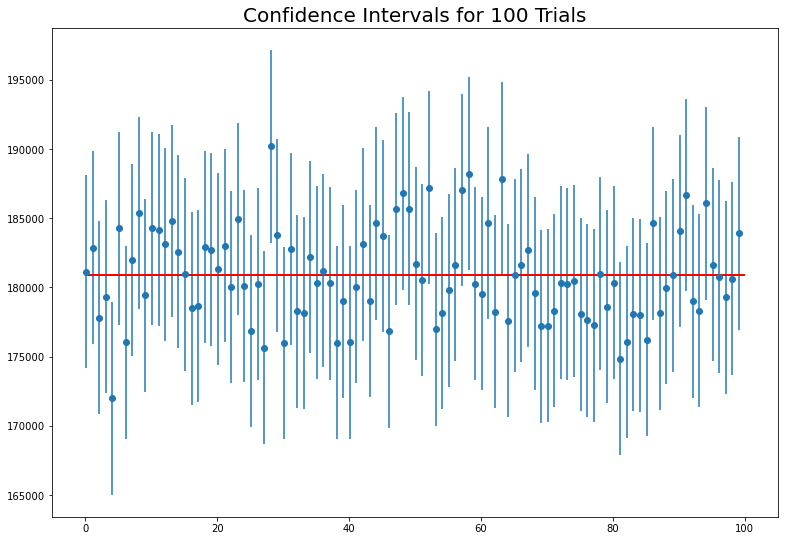

In [26]:
np.random.seed(12)

sample_size = 500

intervals = []
sample_means = []

for sample in range(100):
    sample = np.random.choice(a= data_dm_2['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    # compute z critical value
    z_critical = stats.norm.ppf(1-0.025)

    # compute population standard deviation
    pop_stdev = np.std(data_dm_2['SalePrice'])
  
    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    
plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 100, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=100,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 100 Trials', fontsize = 20)
plt.show()

In [27]:
interval_freq = 0 #Measures the number of times the confidennce interval does not capture the mean
for i in intervals:
    if i[0] > data_dm_2['SalePrice'].mean() or i[1] < data_dm_2['SalePrice'].mean():
        interval_freq += 1
interval_freq

3

The population mean is captured in 97 out of 100 samples taken.